# Task 6.5 Unsupervised Machine Learning: Clustering

## This Script Contains:
- Importing Libraries and Dataframe
- Data Cleaning
- The Elbow Technique
- k-means Clustering
- Reflections
    - Groupby Findings
    - General Findings

### Importing Libraries & Dataframe

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# Making it so any graphs will display without the need to call them
%matplotlib inline

In [3]:
# Defining path
path = r'/Users/ColinLynt/Documents/CareerFoundry/01-22 Crime Data Analysis'

In [4]:
# Importing homicide report data
df_hr = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'Homicide_df.pkl'))

In [5]:
# Setting max rows/columns to see 50 rows/columns
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

### Data Cleaning

In [6]:
# Checking the shape of the df
df_hr.shape

(817709, 23)

In [7]:
# Checking the head of the df
df_hr.head()

,City,State,Agency,Agentype,Solved,Year,Month,ActionType,Homicide,Situation,VicAge,VicSex,VicRace,VicEthnic,OffAge,OffSex,OffRace,OffEthnic,Weapon,Relationship,Circumstance,VicCount,OffCount
0,"Autauga, AL",Alabama,Autauga County,Sheriff,No,1976,September,Normal update,Murder and non-negligent manslaughter,Single victim/unknown offender(s),30.0,Male,Black,Unknown or not reported,31.138045,Unknown,Unknown,Unknown or not reported,Other or type unknown,Relationship not determined,Other,0,0
1,"Autauga, AL",Alabama,Autauga County,Sheriff,Yes,1977,January,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,65.0,Female,Black,Unknown or not reported,62.000000,Male,Black,Unknown or not reported,Other or type unknown,Acquaintance,Brawl due to influence of alcohol,0,0
2,"Autauga, AL",Alabama,Autauga County,Sheriff,Yes,1977,March,Normal update,Murder and non-negligent manslaughter,Single victim/multiple offenders,48.0,Male,White,Unknown or not reported,52.000000,Male,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Acquaintance,Other arguments,0,1
3,"Autauga, AL",Alabama,Prattville,Municipal police,Yes,1977,March,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,27.0,Male,Black,Unknown or not reported,22.000000,Female,Black,Unknown or not reported,Shotgun,Husband,Other arguments,0,0
4,"Autauga, AL",Alabama,Autauga County,Sheriff,Yes,1977,August,Normal update,Murder and non-negligent manslaughter,Single victim/single offender,17.0,Female,Black,Unknown or not reported,21.000000,Male,Black,Unknown or not reported,Knife or cutting instrument,Acquaintance,Circumstances undetermined,0,0


In [8]:
# Assigning numerical value to closeness of victim and offender
def closeness (row):
    if row['Relationship'] == 'Stranger':
        return '1'
    elif row ['Relationship'] == 'Acquaintance':
        return '2'
    elif row ['Relationship'] == 'Other - known to victim':
        return '2'
    elif row ['Relationship'] == 'Wife':
        return '4'
    elif row ['Relationship'] == 'Friend':
        return '3'
    elif row ['Relationship'] == 'Girlfriend':
        return '3'
    elif row ['Relationship'] == 'Son':
        return '4'
    elif row ['Relationship'] == 'Other family':
        return '4'
    elif row ['Relationship'] == 'Husband':
        return '4'
    elif row ['Relationship'] == 'Boyfriend':
        return '3'
    elif row ['Relationship'] == 'Daughter':
        return '4'
    elif row ['Relationship'] == 'Neighbor':
        return '2'
    elif row ['Relationship'] == 'Brother':
        return '4'
    elif row ['Relationship'] == 'Father':
        return '4'
    elif row ['Relationship'] == 'Mother':
        return '4'
    elif row ['Relationship'] == 'In-law':
        return '4'
    elif row ['Relationship'] == 'Common-law wife':
        return '3'
    elif row ['Relationship'] == 'Common-law husband':
        return '3'
    elif row ['Relationship'] == 'Ex-wife':
        return '3'
    elif row ['Relationship'] == 'Stepfather':
        return '4'
    elif row ['Relationship'] == 'Sister':
        return '4'
    elif row ['Relationship'] == 'Homosexual relationship':
        return '3'
    elif row ['Relationship'] == 'Stepson':
        return '4'
    elif row ['Relationship'] == 'Ex-husband':
        return '3'
    elif row ['Relationship'] == 'Stepdaughter':
        return '4'
    elif row ['Relationship'] == 'Employer':
        return '2'
    elif row ['Relationship'] == 'Employee':
        return '2'
    elif row ['Relationship'] == 'Stepmother':
        return '4'

In [9]:
# Adding new column Closeness_Rating - Gives ranked value to Relationships
df_hr['Closeness_Rating'] = df_hr.apply(lambda row : closeness(row), axis = 1)

In [10]:
# Dropping Relationship Undetermined as it does not apply to the relationship
df_hr.drop(df_hr.loc[df_hr['Relationship'] == 'Relationship not determined'].index, inplace = True)

In [11]:
# Checking value counts in Closeness_Rating
df_hr['Closeness_Rating'].value_counts(dropna = False)

2    205744
1    121155
4    107524
3     70128
Name: Closeness_Rating, dtype: int64

In [12]:
# Checking the dtypes to see which columns to drop for K-Means
df_hr.dtypes

City                 object
State                object
Agency               object
Agentype             object
Solved               object
Year                  int64
Month                object
ActionType           object
Homicide             object
Situation            object
VicAge              float64
VicSex               object
VicRace              object
VicEthnic            object
OffAge              float64
OffSex               object
OffRace              object
OffEthnic            object
Weapon               object
Relationship         object
Circumstance         object
VicCount              int64
OffCount              int64
Closeness_Rating     object
dtype: object

In [13]:
# Changing datatype of Closseness_Rating to float64
df_hr['Closeness_Rating'] = df_hr['Closeness_Rating'].astype('int64')

In [14]:
# Dropping columns from the df that
df_drop = df_hr.drop(columns = ['City', 'State', 'Agency','Agentype', 'Solved', 'Month', 'ActionType', 'Homicide', 'Situation', 'VicSex', 'VicRace', 'VicEthnic', 'OffSex', 'OffRace', 'OffEthnic', 'Weapon', 'Relationship', 'Circumstance'])

In [15]:
# Checking remaining columns
df_drop.dtypes

Year                  int64
VicAge              float64
OffAge              float64
VicCount              int64
OffCount              int64
Closeness_Rating      int64
dtype: object

### The Elbow Technique

In [16]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [17]:
score = [kmeans[i].fit(df_drop).score(df_drop) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-308841858.89213073,
 -203067592.96848282,
 -160509806.56022662,
 -135190718.03496593,
 -117234689.46760678,
 -104064904.57783669,
 -93368854.87804209,
 -85938956.55874489,
 -79180673.90406188]

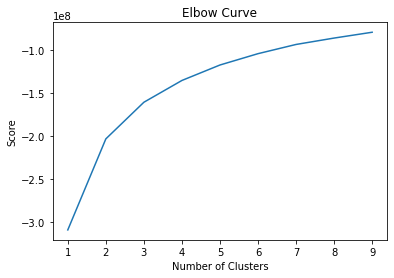

In [18]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### k-means Clustering

In [19]:
# Create the k-means object.
kmeans = KMeans(n_clusters = 4, n_jobs = -1)

Kmeans Chosen: I chose four because this is where the Elbow curve starts to flatten out compared to the steady jump from one to three. This means five is the optimal count for my clustering.

In [20]:
# Fit the k-means object to the data.

kmeans.fit(df_drop)

/Users/ColinLynt/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [21]:
df_drop['clusters'] = kmeans.fit_predict(df_drop)

/Users/ColinLynt/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [22]:
df_drop.head()

,Year,VicAge,OffAge,VicCount,OffCount,Closeness_Rating,clusters
1,1977,65.0,62.0,0,0,2,2
2,1977,48.0,52.0,0,1,2,2
3,1977,27.0,22.0,0,0,4,1
4,1977,17.0,21.0,0,0,2,1
5,1977,62.0,80.0,0,0,1,2


In [23]:
df_drop['clusters'].value_counts()

1    218436
3    134098
2     76043
0     75974
Name: clusters, dtype: int64

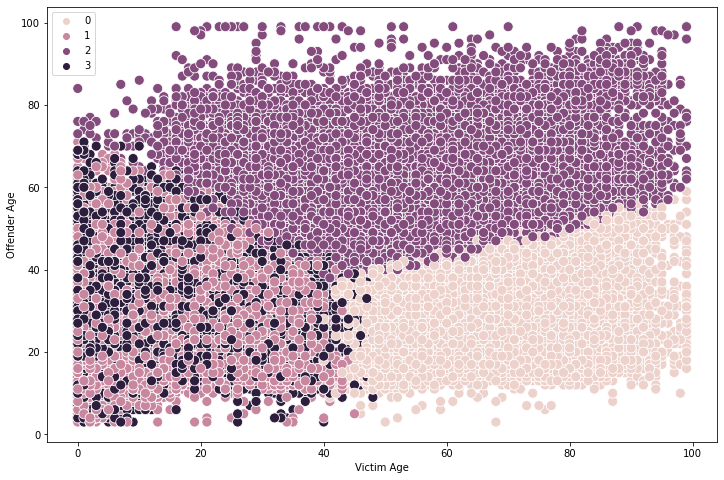

In [24]:
# Ploting the clusters for the "Victim Age" and "Offender Age" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_drop['VicAge'], y=df_drop['OffAge'], hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Victim Age')
plt.ylabel('Offender Age')
plt.show()

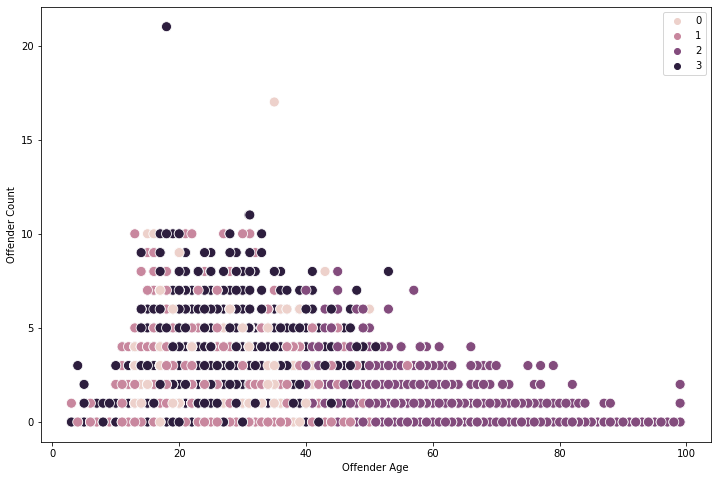

In [25]:
# Ploting the clusters for the "Offender Age" and "Offender Count" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_drop['OffAge'], y = df_drop['OffCount'], hue = kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Offender Age') 
plt.ylabel('Offender Count') 
plt.show()

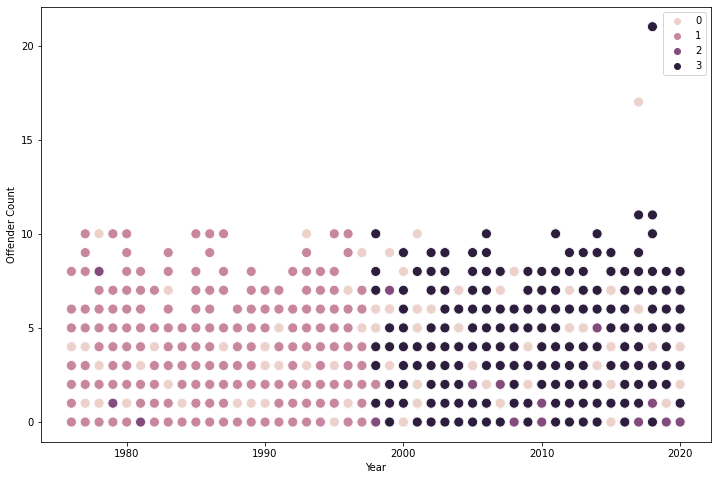

In [26]:
# Ploting the clusters for the "Year" and "Offender Count" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_drop['Year'], y = df_drop['OffCount'], hue = kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Year') 
plt.ylabel('Offender Count') 
plt.show()

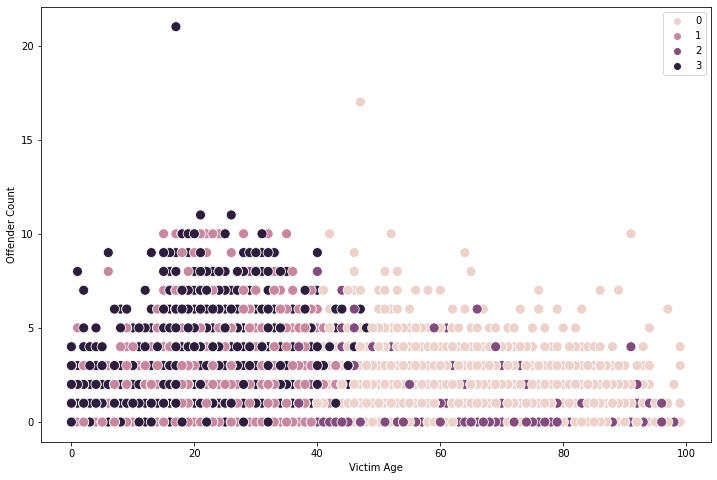

In [27]:
# Ploting the clusters for the "Offender Age" and "Offender Count" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_drop['VicAge'], y = df_drop['OffCount'], hue = kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Victim Age') 
plt.ylabel('Offender Count') 
plt.show()

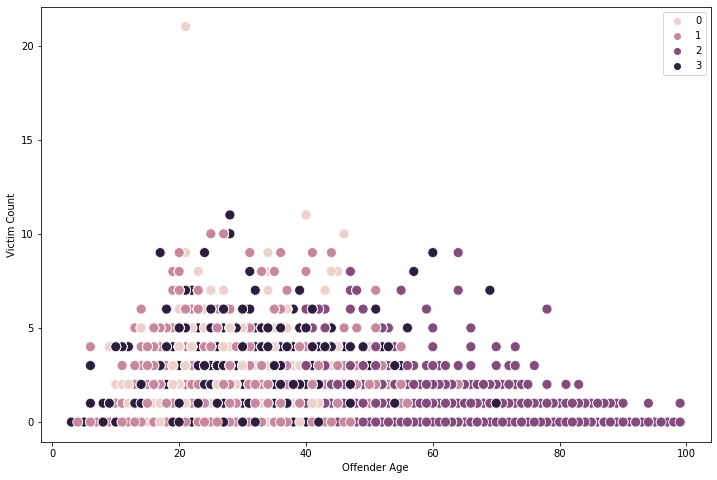

In [28]:
# Ploting the clusters for the "Offender Age" and "Victim Count" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_drop['OffAge'], y = df_drop['VicCount'], hue = kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Offender Age') 
plt.ylabel('Victim Count') 
plt.show()

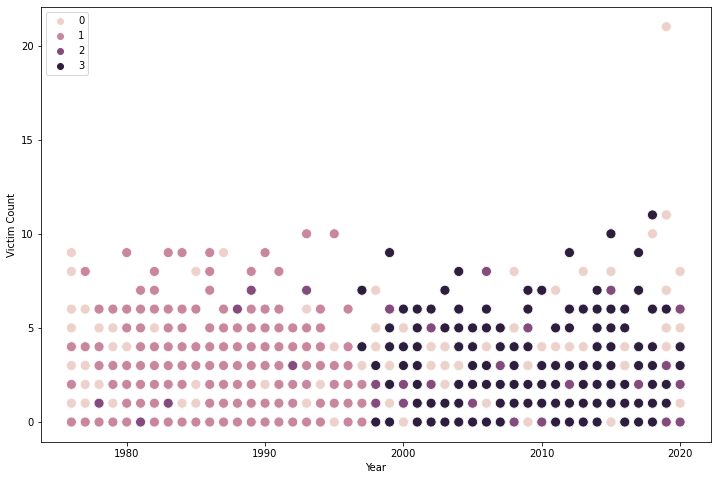

In [29]:
# Ploting the clusters for the "Year" and "Victim Count" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_drop['Year'], y = df_drop['VicCount'], hue = kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Year') 
plt.ylabel('Victim Count') 
plt.show()

/Users/ColinLynt/opt/anaconda3/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


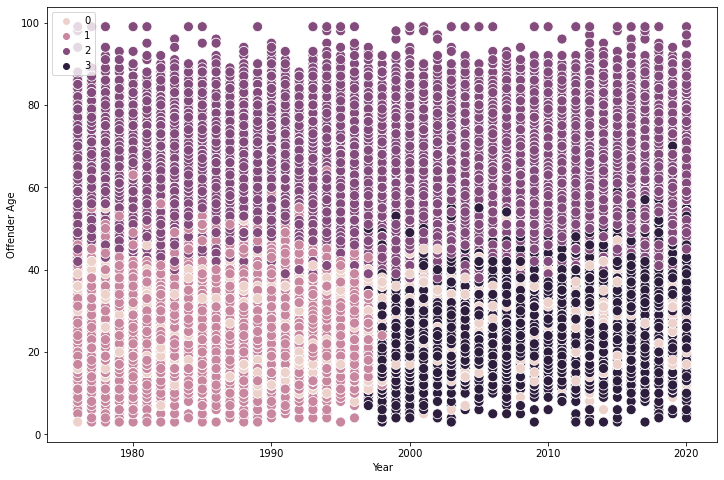

In [30]:
# Ploting the clusters for the "Year" and "Offender Age" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_drop['Year'], y = df_drop['OffAge'], hue = kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Year') 
plt.ylabel('Offender Age') 
plt.show()

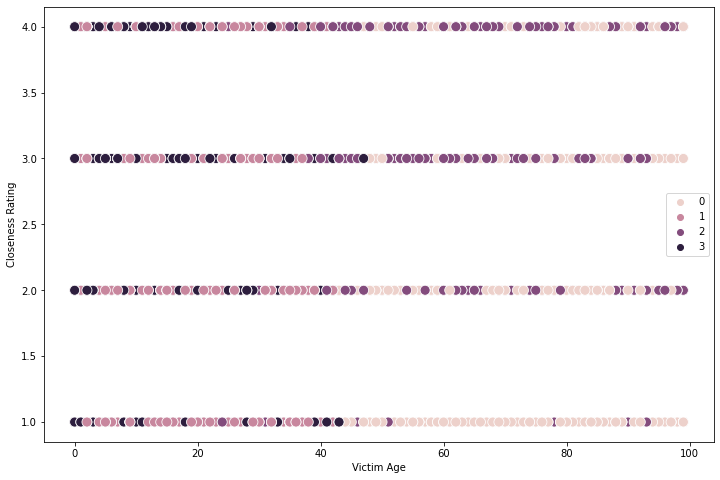

In [38]:
# Ploting the clusters for the "Victim Age" and "Closeness Rating" variables
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = df_drop['VicAge'], y = df_drop['Closeness_Rating'], hue = kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Victim Age') 
plt.ylabel('Closeness Rating') 
plt.show()

In [39]:
df_drop.loc[df_drop['clusters'] == 3, 'cluster'] = 'black'
df_drop.loc[df_drop['clusters'] == 2, 'cluster'] = 'purple'
df_drop.loc[df_drop['clusters'] == 1, 'cluster'] = 'pink'
df_drop.loc[df_drop['clusters'] == 0, 'cluster'] = 'peach'

In [42]:
df_drop.groupby('cluster').agg({'VicCount':['mean', 'median'],
                                'OffCount':['mean', 'median'],
                                'Year':['mean', 'median'],
                                'VicAge':['mean', 'median'],
                                'OffAge':['mean', 'median'],
                                'Closeness_Rating':['mean', 'median']})

VicCount         OffCount                Year            VicAge  \
             mean median      mean median         mean median       mean   
cluster                                                                    
black    0.152993      0  0.309393      0  2009.073133   2009  24.226354   
peach    0.164293      0  0.249862      0  1994.851410   1993  57.150696   
pink     0.105331      0  0.195632      0  1986.307239   1986  25.219241   
purple   0.107650      0  0.054180      0  1997.484778   1997  47.855694   

                   OffAge        Closeness_Rating         
        median       mean median             mean median  
cluster                                                   
black     25.0  27.377007   26.0         2.232584      2  
peach     54.0  28.463151   29.0         2.222445      2  
pink      25.0  27.315299   27.0         2.244319      2  
purple    46.0  54.063135   52.0         2.822745      3

### Reflections

##### Groupby Findings
The distinction between the clusters is not particularly clear from the descriptive statistics. There is some variance among the Year, Victim Age, and Offender Age variables. However, when taken together, this does not provide any additional clarity to the scatter plot analysis.

##### General Findings
After trying multiple different combinations of variables and a number of clusters, it would seem the data has no solid conclusions from this analysis. Although the clusters don't make sense, this is still a useful insight. In order to explore the data further, a supplemental dataset would be necessary for a meaningful machine learning-based analysis to fit.